# Peak strategy 2

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as s
from IPython.display import clear_output


In [150]:
df = pd.read_csv("../data/peak-test.csv")

In [151]:
df = df[:80000]

In [109]:
df.head(2)

,target,close,high,low
80000,0.0,40951.67,41013.85,40850.00
80001,0.0,41080.83,41243.53,40942.32


In [116]:
tp_pct = 0.01
sl_pct = 0.01

btc = None
price = None
tp = None
sl = None

total = 100
total_and_btc = None
total_plot = []
amt = 20

plot = [] #[None, ]

for i in range(len(df)):
    close = df.iloc[i].close
    high = df.iloc[i].high
    low = df.iloc[i].low
    target = df.iloc[i].target
    if sl and low<sl: #Stop loss hit, sell
        plot.append(-sl)
        total += btc*close*0.999
        btc = None
        price = None
        tp = None
        sl = None
    elif tp and high>tp: #take profit hit, sell
        plot.append(-tp)
        total += btc*close*0.999
        btc = None
        price = None
        tp = None
        sl = None
    elif not tp and not sl and target: #Target says to buy and can buy:
        btc = amt*0.999/close
        price = close
        tp = (1+tp_pct)*close
        sl = (1-sl_pct)*close
        total -= amt
        plot.append(price)
    else:
        plot.append(None)
    b = amt if btc != None else 0
    total_and_btc = total + b
    total_plot.append(total_and_btc)

In [117]:
total_and_btc

92.75086683836756

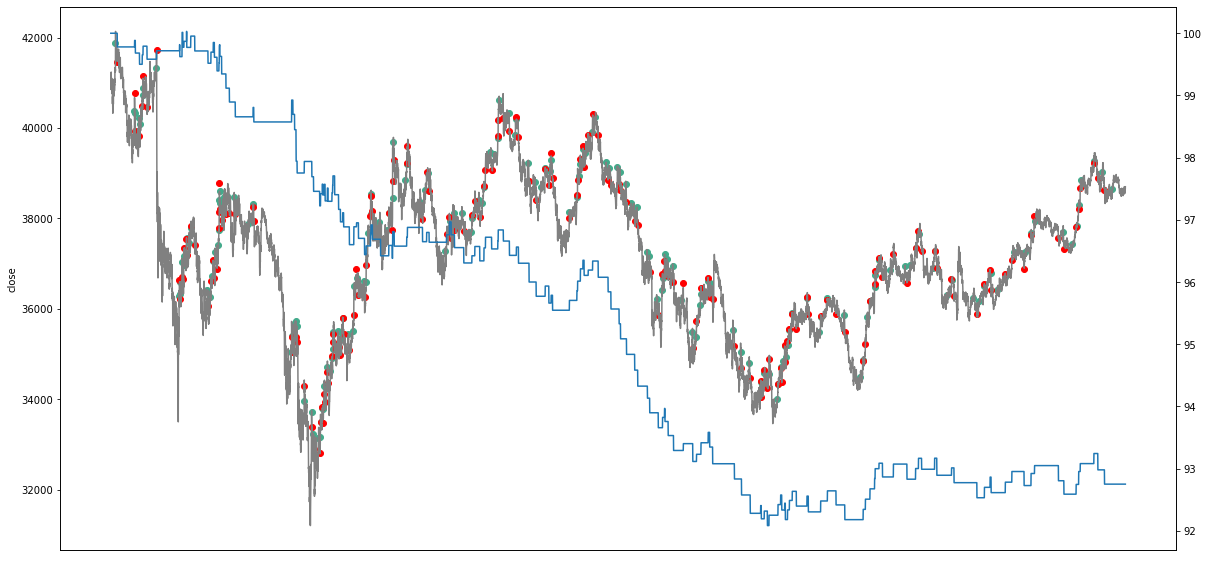

In [118]:
a = 0
b = 20000
fig,ax = plt.subplots(figsize=(20, 10))



plot_buy = list(map(lambda x: None if x == None or x<0 else x, plot[a:b]))
plot_sell = list(map(lambda x: None if x == None or x>0 else -x, plot[a:b]))

# ax.plot(acc[a:b])

# ax1 = ax.twiny()

ax.scatter(range(b-a), 
            plot_buy,
            color="#43aa8b")

ax.scatter(range(b-a), 
            plot_sell,
            color="red")

ax.set_xlabel("time")
ax.set_ylabel("close")
ax.plot(list(df.close)[a:b],
        color="gray")
# ax.plot(list(df.high)[a:b],
#         color="lightgreen")
# ax.plot(list(df.low)[a:b],
#         color="pink")

ax1 = ax.twinx()
ax1.plot(total_plot[a:b])
# ax1.plot(usd[a:b])
# ax.plot(blimit[a:b], color="lightgray")
# ax.plot(slimit[a:b], color="lightgray")

ax.tick_params(labelbottom=False)
ax.axes.xaxis.set_visible(False)

In [119]:
def strategy(tp_pct, sl_pct):
    """for optimizing paramaters"""
    btc = None
    price = None
    tp = None
    sl = None

    total = 100
    total_and_btc = None
    amt = 20

    plot = [] #[None, ]

    for i in range(len(df)):
        close = df.iloc[i].close
        high = df.iloc[i].high
        low = df.iloc[i].low
        target = df.iloc[i].target
        if sl and low<sl: #Stop loss hit, sell
            plot.append(-sl)
            total += btc*close*0.999
            btc = None
            price = None
            tp = None
            sl = None
        elif tp and high>tp: #take profit hit, sell
            plot.append(-tp)
            total += btc*close*0.999
            btc = None
            price = None
            tp = None
            sl = None
        elif not tp and not sl and target: #Target says to buy and can buy:
            btc = amt*0.999/close
            price = close
            tp = (1+tp_pct)*close
            sl = (1-sl_pct)*close
            total -= amt
            plot.append(price)
        else:
            plot.append(None)
        b = amt if btc != None else 0
        total_and_btc = total + b
    return total_and_btc

In [120]:
strategy(0.01, 0.01)

92.75086683836756

In [152]:
d = {}

In [153]:
for i1 in [0.01, 0.02, 0.03, 0.05, 0.07, 0.09]:
    for i2 in [0.01, 0.02, 0.03, 0.05, 0.07, 0.09]:
        d["tp:" + str(i1) + " sl:" + str(i2)] = strategy(i1, i2)
        clear_output()
        print(max(d.values()))
        print(d)

96.7418805390513
{'tp:0.01 sl:0.01': 77.80621458322561, 'tp:0.01 sl:0.02': 81.53913941233391, 'tp:0.01 sl:0.03': 85.86898373910267, 'tp:0.01 sl:0.05': 88.0479563020412, 'tp:0.01 sl:0.07': 86.26630982710773, 'tp:0.01 sl:0.09': 91.10248553624652, 'tp:0.02 sl:0.01': 83.44782308950138, 'tp:0.02 sl:0.02': 88.2546840778362, 'tp:0.02 sl:0.03': 88.92491148971618, 'tp:0.02 sl:0.05': 91.97088318916065, 'tp:0.02 sl:0.07': 90.43112761082034, 'tp:0.02 sl:0.09': 94.01291966262906, 'tp:0.03 sl:0.01': 89.13630583289894, 'tp:0.03 sl:0.02': 90.44164985740662, 'tp:0.03 sl:0.03': 89.45245778430254, 'tp:0.03 sl:0.05': 91.3177951019165, 'tp:0.03 sl:0.07': 94.62801782521012, 'tp:0.03 sl:0.09': 95.39212400207768, 'tp:0.05 sl:0.01': 91.35486210074498, 'tp:0.05 sl:0.02': 92.51613179096313, 'tp:0.05 sl:0.03': 91.2083617303185, 'tp:0.05 sl:0.05': 93.29093638334895, 'tp:0.05 sl:0.07': 92.64713141527453, 'tp:0.05 sl:0.09': 96.7418805390513, 'tp:0.07 sl:0.01': 90.46399356238554, 'tp:0.07 sl:0.02': 90.92336909561672,

In [140]:
max(d.values())

100.11404571334454